In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt

Metadata Information:
seriesId: 59
relayType: E
relayId: 2
cycles: 21741
storeNth: 50
resistiveLoad: 3
lastEvent: stuck closed
voltage: 5
numSamples: 2500
recordingInterval: 5


Extracted Contact Resistance Data:
                                    time  resistance
0    2021-06-08 14:22:46.910417920+00:00          54
1    2021-06-08 14:22:48.389758976+00:00         142
2    2021-06-08 14:22:49.599049984+00:00         176
3    2021-06-08 14:22:50.410260992+00:00         175
4    2021-06-08 14:22:51.186522880+00:00         153
...                                  ...         ...
1735 2021-06-08 14:48:05.721796864+00:00         107
1736 2021-06-08 14:48:06.448900096+00:00         106
1737 2021-06-08 14:48:07.205316096+00:00         102
1738 2021-06-08 14:48:07.953355008+00:00         107
1739 2021-06-08 14:48:08.714589952+00:00         103

[1740 rows x 2 columns]


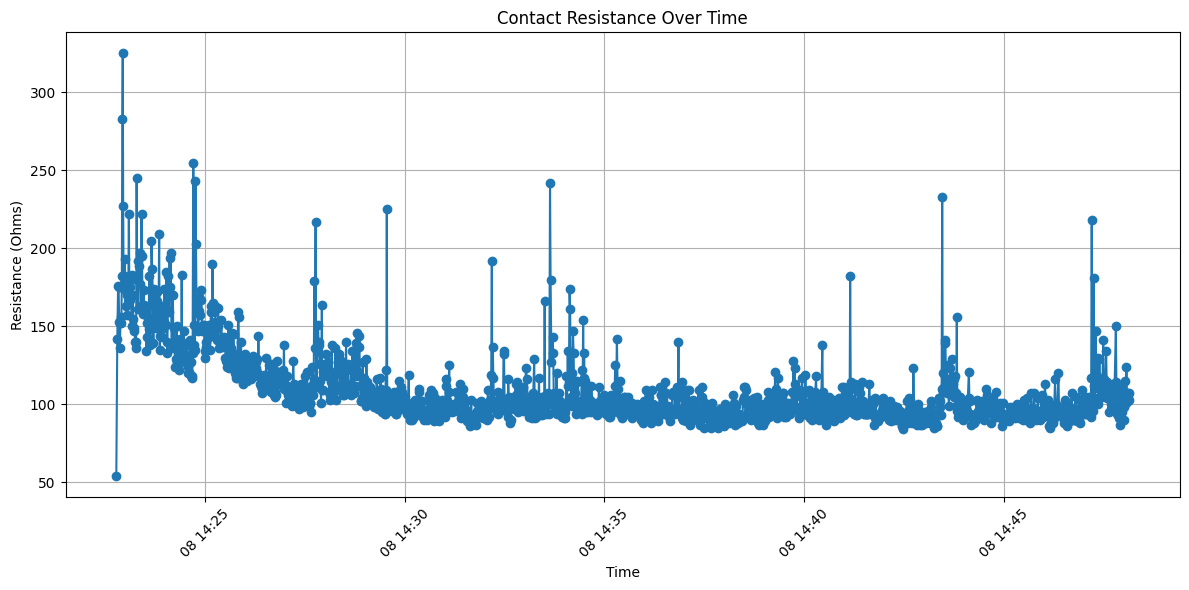

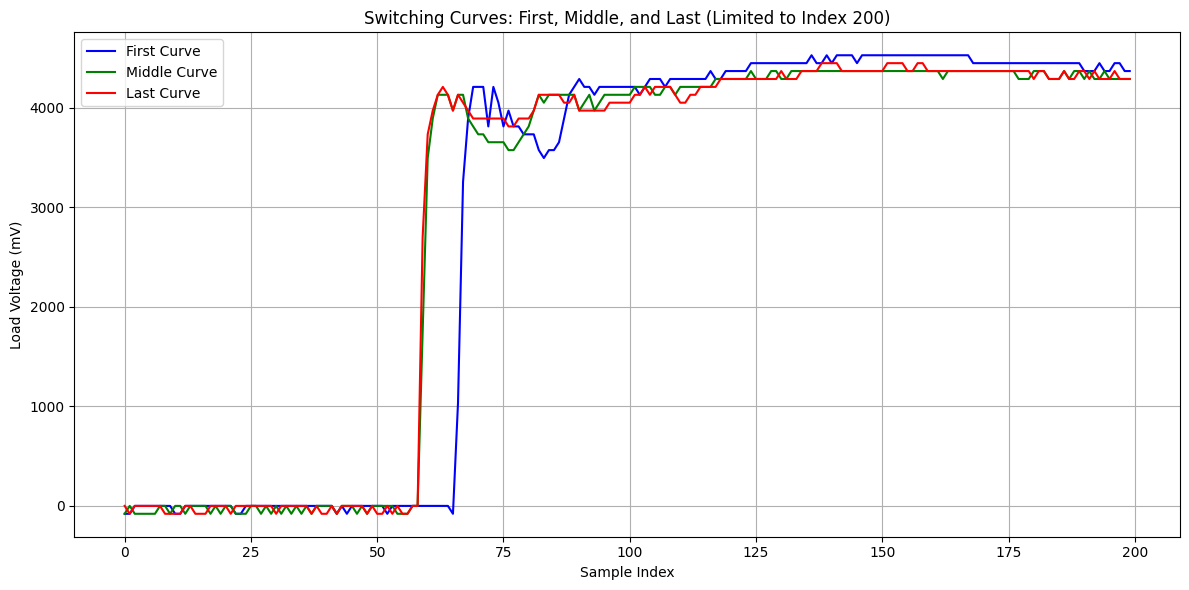

In [47]:
file_path = 'C:/Users/Cao Tuan/Downloads/E2.json'  # Replace with your actual file path

# Load the JSON file from the specified path
with open(file_path, 'r') as file:
    data = json.load(file)

resistance_data = data['contactResistance']['values']
df = pd.DataFrame(resistance_data, columns=data['contactResistance']['columns'])
df['time'] = pd.to_datetime(df['time'])

metadata = data.get('metadata', {})
print("Metadata Information:")
for key, value in metadata.items():
    print(f"{key}: {value}")
print("\n")
print("Extracted Contact Resistance Data:")
print(df)

# Plotting the contact resistance data

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['resistance'], marker='o', linestyle='-')
plt.title('Contact Resistance Over Time')
plt.xlabel('Time')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Determine indices
print("\n")
first_index = 0
last_index = len(data['switchingCurves']) - 2
middle_index = len(data['switchingCurves']) // 2 -1

# Extract data for first, middle, and last indices
first_curve = data['switchingCurves'][first_index]['values']
middle_curve = data['switchingCurves'][middle_index]['values']
last_curve = data['switchingCurves'][last_index]['values']

# Create DataFrames for plotting
df_first = pd.DataFrame(first_curve, columns=data['switchingCurves'][0]['columns'])
df_middle = pd.DataFrame(middle_curve, columns=data['switchingCurves'][middle_index]['columns'])
df_last = pd.DataFrame(last_curve, columns=data['switchingCurves'][last_index]['columns'])

# Limit data to index 200
df_first_limited = df_first.iloc[:200]
df_middle_limited = df_middle.iloc[:200]
df_last_limited = df_last.iloc[:200]

# Plotting each set of data with different colors for clarity
plt.figure(figsize=(12, 6))
plt.plot(df_first_limited.index, df_first_limited['voltage'], linestyle='-', label='First Curve', color='blue')
plt.plot(df_middle_limited.index, df_middle_limited['voltage'], linestyle='-', label='Middle Curve', color='green')
plt.plot(df_last_limited.index, df_last_limited['voltage'], linestyle='-', label='Last Curve', color='red')

# Adding titles and labels
plt.title('Switching Curves: First, Middle, and Last (Limited to Index 200)')
plt.xlabel('Sample Index')
plt.ylabel('Load Voltage (mV)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()